In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nfl_data_py as nfl

In [6]:
df_seasonal = nfl.import_seasonal_data([2021, 2022, 2023], s_type='REG')

In [7]:
columns_to_drop = ['season_type', 'sacks', 'passing_first_downs', 'sack_fumbles', 'sack_fumbles_lost', 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_fumbles', 'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_first_downs', 'special_teams_tds',
                  'passing_air_yards', 'passing_yards_after_catch', 'passing_epa', 'pacr', 'dakota', 'sack_yards', 'rushing_epa', 'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_epa', 'racr', 'air_yards_share', 'wopr_x', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh', 'rfd_sh', 'rtdfd_sh', 'dom', 'w8dom', 'yptmpa', 'ppr_sh', 'fantasy_points']

df_seasonal = df_seasonal.drop(columns=columns_to_drop)
df_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 0 to 1861
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  1862 non-null   object 
 1   season                     1862 non-null   int64  
 2   completions                1862 non-null   int32  
 3   attempts                   1862 non-null   int32  
 4   passing_yards              1862 non-null   float64
 5   passing_tds                1862 non-null   int32  
 6   interceptions              1862 non-null   float64
 7   passing_2pt_conversions    1862 non-null   int32  
 8   carries                    1862 non-null   int32  
 9   rushing_yards              1862 non-null   float64
 10  rushing_tds                1862 non-null   int32  
 11  rushing_2pt_conversions    1862 non-null   int32  
 12  receptions                 1862 non-null   int32  
 13  targets                    1862 non-null   int32

In [8]:
# check for missing values in each row
df_seasonal.isnull().sum()

player_id                    0
season                       0
completions                  0
attempts                     0
passing_yards                0
passing_tds                  0
interceptions                0
passing_2pt_conversions      0
carries                      0
rushing_yards                0
rushing_tds                  0
rushing_2pt_conversions      0
receptions                   0
targets                      0
receiving_yards              0
receiving_tds                0
receiving_2pt_conversions    0
target_share                 0
fantasy_points_ppr           0
games                        0
dtype: int64

In [10]:
columns_not_to_use_as_feature_for_WR = [
    'player_id',
    'season', 
    'completions',
    'attempts',
    'passing_yards',
    'passing_tds',
    'interceptions',
    'passing_2pt_conversions',
    'carries',
    'rushing_yards',
    'rushing_tds',
    'rushing_2pt_conversions',
    'receiving_yards',
    'receiving_2pt_conversions',
    'games'
]
df_wr = df_seasonal.drop(columns_not_to_use_as_feature_for_WR, axis=1)

In [11]:
df_wr

,receptions,targets,receiving_tds,target_share,fantasy_points_ppr
0,0,0,0,0.000000,374.74
1,0,1,0,0.034483,271.66
2,0,0,0,0.000000,0.00
3,0,0,0,0.000000,0.16
4,0,0,0,0.000000,218.10
...,...,...,...,...,...
1857,0,0,0,0.000000,156.38
1858,0,0,0,0.000000,102.02
1859,1,1,0,0.023256,275.02
1860,0,0,0,0.000000,72.68


In [13]:
df_wr = df_wr[df_wr['receptions'] > 10]
df_wr

,receptions,targets,receiving_tds,target_share,fantasy_points_ppr
9,23,28,0,0.841075,44.4
14,24,38,3,1.184179,68.8
20,20,34,2,1.011158,75.8
34,48,83,4,2.127993,132.4
36,55,89,6,2.045979,171.2
...,...,...,...,...,...
1852,105,160,6,4.870507,298.5
1854,52,71,1,2.027916,242.1
1855,34,46,1,1.413489,75.2
1856,64,94,8,2.827228,217.2


In [43]:
X = df_wr.drop(columns=['fantasy_points_ppr'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 9 to 1861
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   receptions     848 non-null    int32  
 1   targets        848 non-null    int32  
 2   receiving_tds  848 non-null    int32  
 3   target_share   848 non-null    float64
dtypes: float64(1), int32(3)
memory usage: 23.2 KB


In [44]:
y = df_wr['fantasy_points_ppr']
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 848 entries, 9 to 1861
Series name: fantasy_points_ppr
Non-Null Count  Dtype  
--------------  -----  
848 non-null    float64
dtypes: float64(1)
memory usage: 13.2 KB


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 1300 to 240
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   receptions     678 non-null    int32  
 1   targets        678 non-null    int32  
 2   receiving_tds  678 non-null    int32  
 3   target_share   678 non-null    float64
dtypes: float64(1), int32(3)
memory usage: 18.5 KB


In [46]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 1477 to 757
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   receptions     170 non-null    int32  
 1   targets        170 non-null    int32  
 2   receiving_tds  170 non-null    int32  
 3   target_share   170 non-null    float64
dtypes: float64(1), int32(3)
memory usage: 4.6 KB


In [22]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
# print out some model parameters
print('Intercept:   ', lr.intercept_)
print('Coefficients:', lr.coef_)

Intercept:    18.743891722517503
Coefficients: [ 4.29730887 -1.8684468   4.41250323 16.87337576]


In [50]:
y_pred = lr.predict(X_test)

In [51]:
pd.DataFrame({'actual':y_test, 'predicted':lr.predict(X_test)})

,actual,predicted
1477,24.30,38.545418
772,47.60,82.661456
255,114.30,134.690734
1499,76.80,104.818747
130,278.86,302.333794
...,...,...
1657,39.70,73.483035
362,193.30,69.107561
1067,213.50,199.412101
239,285.50,276.720161


Intercept:    18.743891722517503
Coefficients: [ 4.29730887 -1.8684468   4.41250323 16.87337576]


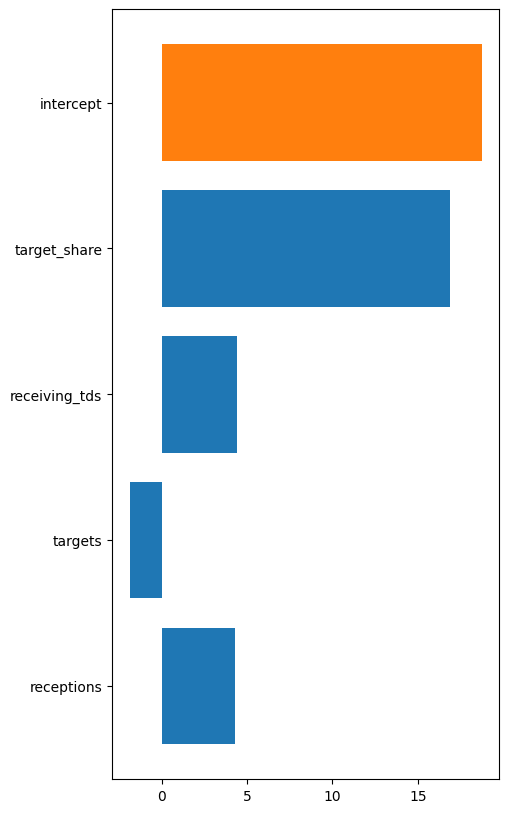

In [52]:
# lets look at the coefficients
plt.figure(figsize=(5, 10))
plt.barh(
    list(X.columns) + ['intercept'],
    list(lr.coef_) + [lr.intercept_],
    color=(['C0']*len(lr.coef_)) + ['C1']
)
print('Intercept:   ', lr.intercept_)
print('Coefficients:', lr.coef_)

In [53]:
def plotResult(y_test,y_pred):
  plt.scatter(y_test, y_pred, s = 2)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
  plt.xlabel('actual value')
  plt.ylabel('predicted value')
  plt.show()

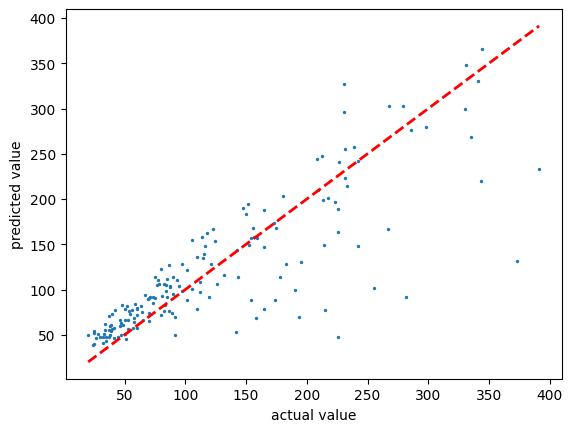

In [54]:
plotResult(y_test, lr.predict(X_test))